In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (20, 10)

In [2]:
df = pd.read_csv('data/treasury_rates.csv')

In [3]:
df

,DATE,DGS6MO,DGS1,DGS2,DGS5,DGS10,DGS30
0,1986-02-18,7.42,7.56,7.96,8.28,8.64,8.89
1,1986-02-19,7.51,7.67,8.06,8.37,8.7,8.92
2,1986-02-20,7.54,7.68,8.05,8.39,8.67,8.88
3,1986-02-21,7.42,7.56,7.93,8.24,8.48,8.73
4,1986-02-24,7.41,7.53,7.86,8.2,8.39,8.61
...,...,...,...,...,...,...,...
9188,2021-05-07,0.04,0.05,0.14,0.77,1.6,2.28
9189,2021-05-10,0.04,0.05,0.16,0.8,1.63,2.32
9190,2021-05-11,0.04,0.05,0.16,0.8,1.64,2.35
9191,2021-05-12,0.04,0.05,0.16,0.87,1.69,2.4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9193 entries, 0 to 9192
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   DATE    9193 non-null   object
 1   DGS6MO  9193 non-null   object
 2   DGS1    9193 non-null   object
 3   DGS2    9193 non-null   object
 4   DGS5    9193 non-null   object
 5   DGS10   9193 non-null   object
 6   DGS30   9193 non-null   object
dtypes: object(7)
memory usage: 502.9+ KB


* Date needs to be set to datetime
* Other values should be floats.  I suspect this is because the null values are '.'

In [5]:
df['DATE'] = pd.to_datetime(df['DATE'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9193 entries, 0 to 9192
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    9193 non-null   datetime64[ns]
 1   DGS6MO  9193 non-null   object        
 2   DGS1    9193 non-null   object        
 3   DGS2    9193 non-null   object        
 4   DGS5    9193 non-null   object        
 5   DGS10   9193 non-null   object        
 6   DGS30   9193 non-null   object        
dtypes: datetime64[ns](1), object(6)
memory usage: 502.9+ KB


In [7]:
df.head(20)

,DATE,DGS6MO,DGS1,DGS2,DGS5,DGS10,DGS30
0,1986-02-18,7.42,7.56,7.96,8.28,8.64,8.89
1,1986-02-19,7.51,7.67,8.06,8.37,8.7,8.92
2,1986-02-20,7.54,7.68,8.05,8.39,8.67,8.88
3,1986-02-21,7.42,7.56,7.93,8.24,8.48,8.73
4,1986-02-24,7.41,7.53,7.86,8.2,8.39,8.61
5,1986-02-25,7.43,7.59,7.89,8.21,8.4,8.6
6,1986-02-26,7.42,7.57,7.88,8.07,8.36,8.54
7,1986-02-27,7.36,7.48,7.72,7.91,8.15,8.32
8,1986-02-28,7.36,7.43,7.71,7.91,8.13,8.27
9,1986-03-03,7.3,7.35,7.55,7.76,7.99,8.16


* The missing data here is from Christmas and New Years, which makes sense since the market is closed.
* I'll fill in the missing data from the value of the previous day.

In [8]:
df = df.replace('.', np.nan).ffill(axis=0)

In [9]:
df

,DATE,DGS6MO,DGS1,DGS2,DGS5,DGS10,DGS30
0,1986-02-18,7.42,7.56,7.96,8.28,8.64,8.89
1,1986-02-19,7.51,7.67,8.06,8.37,8.7,8.92
2,1986-02-20,7.54,7.68,8.05,8.39,8.67,8.88
3,1986-02-21,7.42,7.56,7.93,8.24,8.48,8.73
4,1986-02-24,7.41,7.53,7.86,8.2,8.39,8.61
...,...,...,...,...,...,...,...
9188,2021-05-07,0.04,0.05,0.14,0.77,1.6,2.28
9189,2021-05-10,0.04,0.05,0.16,0.8,1.63,2.32
9190,2021-05-11,0.04,0.05,0.16,0.8,1.64,2.35
9191,2021-05-12,0.04,0.05,0.16,0.87,1.69,2.4


In [10]:
df = df.rename(columns={'DATE': 'date',
                        'DGS6MO': 'mo_6',
                        'DGS1': 'yr_1',
                        'DGS2': 'yr_2',
                        'DGS5': 'yr_5',
                        'DGS10': 'yr_10',
                        'DGS30': 'yr_30'})

In [11]:
df.set_index('date', inplace=True)

In [12]:
df = df['1989':]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8444 entries, 1989-01-02 to 2021-05-13
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mo_6    8444 non-null   object
 1   yr_1    8444 non-null   object
 2   yr_2    8444 non-null   object
 3   yr_5    8444 non-null   object
 4   yr_10   8444 non-null   object
 5   yr_30   8444 non-null   object
dtypes: object(6)
memory usage: 461.8+ KB


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8444 entries, 1989-01-02 to 2021-05-13
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mo_6    8444 non-null   object
 1   yr_1    8444 non-null   object
 2   yr_2    8444 non-null   object
 3   yr_5    8444 non-null   object
 4   yr_10   8444 non-null   object
 5   yr_30   8444 non-null   object
dtypes: object(6)
memory usage: 461.8+ KB


In [15]:
df =df.iloc[:,0:] = df.iloc[:,0:].astype('float')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8444 entries, 1989-01-02 to 2021-05-13
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mo_6    8444 non-null   float64
 1   yr_1    8444 non-null   float64
 2   yr_2    8444 non-null   float64
 3   yr_5    8444 non-null   float64
 4   yr_10   8444 non-null   float64
 5   yr_30   8444 non-null   float64
dtypes: float64(6)
memory usage: 461.8 KB


In [17]:
df['ys'] = df['yr_10'] - df['mo_6']

In [18]:
df.describe()

,mo_6,yr_1,yr_2,yr_5,yr_10,yr_30,ys
count,8444.000000,8444.000000,8444.000000,8444.000000,8444.000000,8444.000000,8444.000000
mean,2.970870,3.091595,3.377055,3.959298,4.485083,5.017933,1.514212
std,2.497012,2.495160,2.504342,2.322941,2.111447,1.902097,1.135793
min,0.020000,0.050000,0.090000,0.190000,0.520000,0.990000,-0.790000
25%,0.380000,0.520000,0.910000,1.790000,2.610000,3.200000,0.530000
50%,2.490000,2.600000,3.025000,3.850000,4.370000,4.930000,1.460000
75%,5.162500,5.260000,5.520000,5.850000,6.060000,6.360000,2.470000
max,9.690000,9.850000,9.920000,9.750000,9.530000,9.310000,3.740000


In [19]:
df

,mo_6,yr_1,yr_2,yr_5,yr_10,yr_30,ys
date,,,,,,,
1989-01-02,8.67,9.02,9.14,9.14,9.14,9.00,0.47
1989-01-03,8.77,9.11,9.21,9.25,9.23,9.09,0.46
1989-01-04,8.87,9.14,9.25,9.24,9.22,9.08,0.35
1989-01-05,8.97,9.22,9.32,9.32,9.27,9.10,0.30
1989-01-06,8.97,9.20,9.32,9.30,9.25,9.06,0.28
...,...,...,...,...,...,...,...
2021-05-07,0.04,0.05,0.14,0.77,1.60,2.28,1.56
2021-05-10,0.04,0.05,0.16,0.80,1.63,2.32,1.59
2021-05-11,0.04,0.05,0.16,0.80,1.64,2.35,1.60


array([<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>], dtype=object)

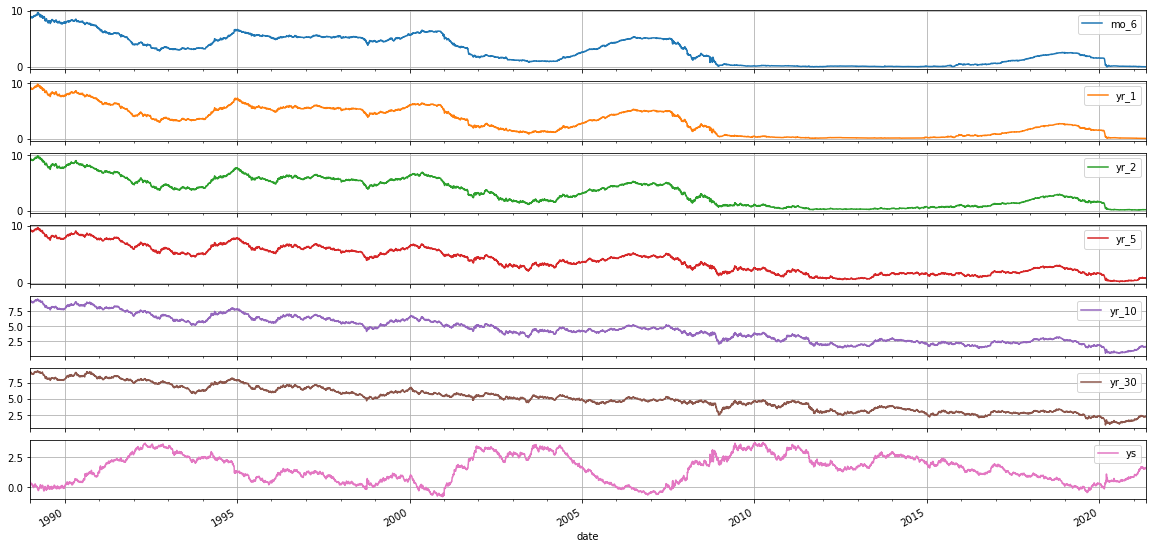

In [20]:
df.plot(subplots=True, grid=True)

(array([1071., 2152., 1911., 1987., 1323.]),
 array([-0.79 ,  0.116,  1.022,  1.928,  2.834,  3.74 ]),
 <BarContainer object of 5 artists>)

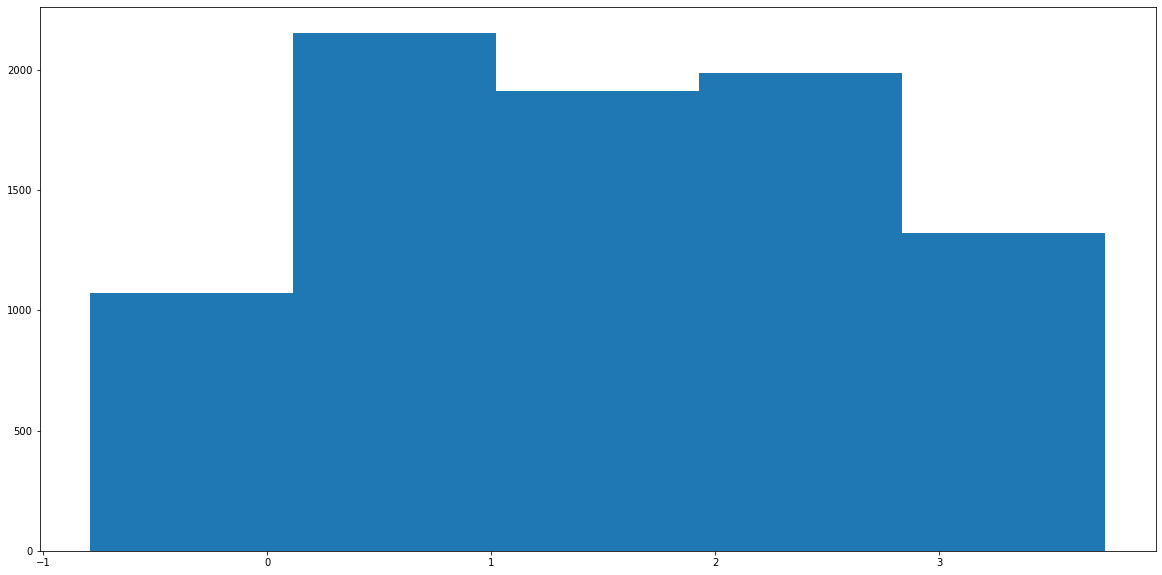

In [21]:
plt.hist(df['ys'], bins=5)

In [22]:
roll_mean = df['ys'].rolling(window=90, center=False).mean()
roll_std = df['ys'].rolling(window=90, center=False).std()

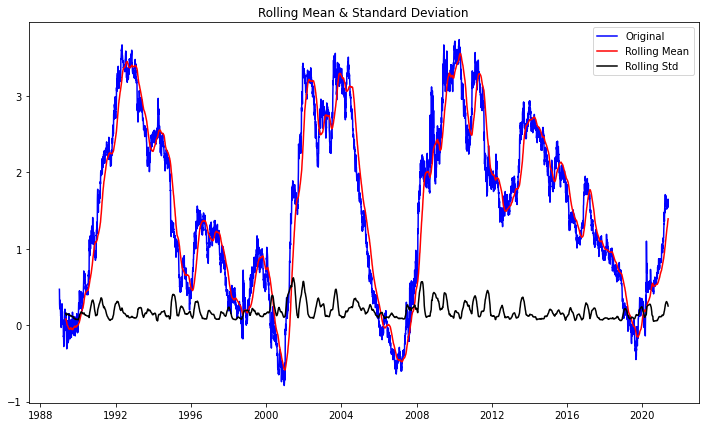

In [23]:
fig = plt.figure(figsize=(12,7))
plt.plot(df['ys'], color='blue', label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.plot(roll_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

* We can see that the trent is linear.
* Rolling std doesn't appear to have issues with heterodasticty.
    * We do see spikes during periods of extreme market volatility, but that's not a surprise.

In [24]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(df['ys'])

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

print ('Results of Dickey-Fuller test: \n')

print(dfoutput)

Results of Dickey-Fuller test: 

Test Statistic                   -2.263377
p-value                           0.184052
#Lags Used                       37.000000
Number of Observations Used    8406.000000
Critical Value (1%)              -3.431128
Critical Value (5%)              -2.861884
Critical Value (10%)             -2.566953
dtype: float64


Results of Dickey-Fuller test: 

Test Statistic                   -2.263377
p-value                           0.184052
#Lags Used                       37.000000
Number of Observations Used    8406.000000
Critical Value (1%)              -3.431128
Critical Value (5%)              -2.861884
Critical Value (10%)             -2.566953
dtype: float64


* Based on the rolling mean as well as the Dickey-Fuller test, our data as it stands is not stationary.

* Let's subract the rolling mean from the values

### Rolling Mean

In [25]:
minus_rm =(df['ys'] - roll_mean).dropna()
minus_rm

date
1989-05-05    0.039222
1989-05-08    0.043111
1989-05-09    0.066667
1989-05-10    0.039333
1989-05-11    0.090889
                ...   
2021-05-07    0.198556
2021-05-10    0.220222
2021-05-11    0.222111
2021-05-12    0.264333
2021-05-13    0.237222
Name: ys, Length: 8355, dtype: float64

In [26]:
dftest = adfuller(minus_rm)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

print ('Results of Dickey-Fuller test: \n')

print(dfoutput)

Results of Dickey-Fuller test: 

Test Statistic                -7.511084e+00
p-value                        4.013991e-11
#Lags Used                     3.700000e+01
Number of Observations Used    8.317000e+03
Critical Value (1%)           -3.431136e+00
Critical Value (5%)           -2.861888e+00
Critical Value (10%)          -2.566955e+00
dtype: float64


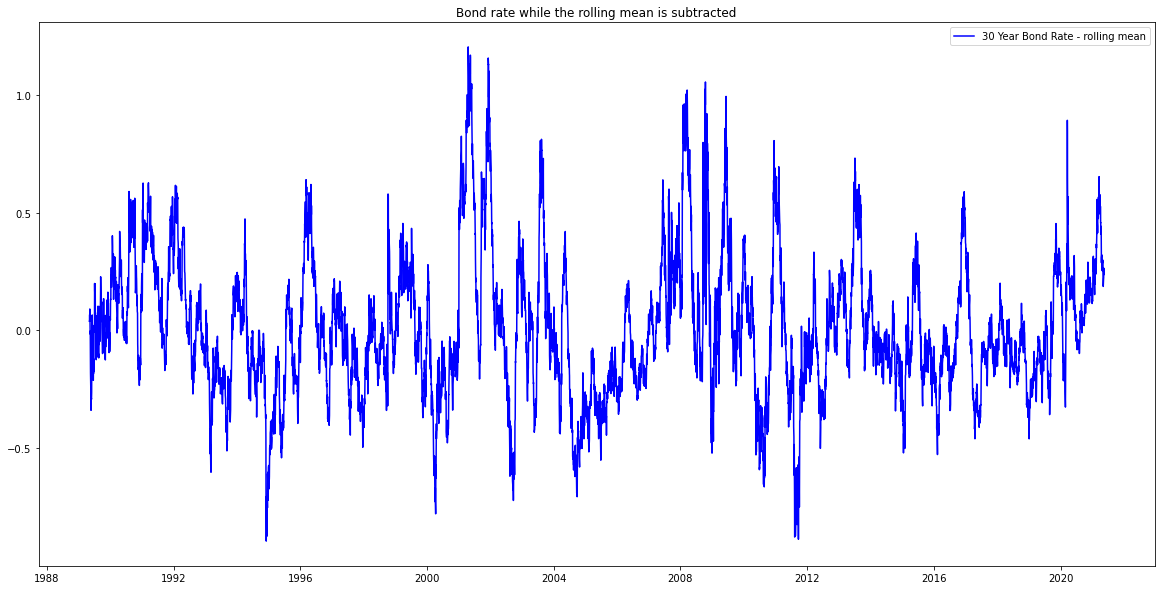

In [27]:
plt.plot(minus_rm, color='blue',label='30 Year Bond Rate - rolling mean')
plt.legend(loc='best')
plt.title('Bond rate while the rolling mean is subtracted')
plt.show(block=False)

* Late 2008: Market Crash
* Late 2011: Debt ceiling crisis.  S&P downgrades US.
* Early 2020: COVID-19

### EWR

In [28]:
exp_roll_mean = df['ys'].ewm(halflife=45).mean()

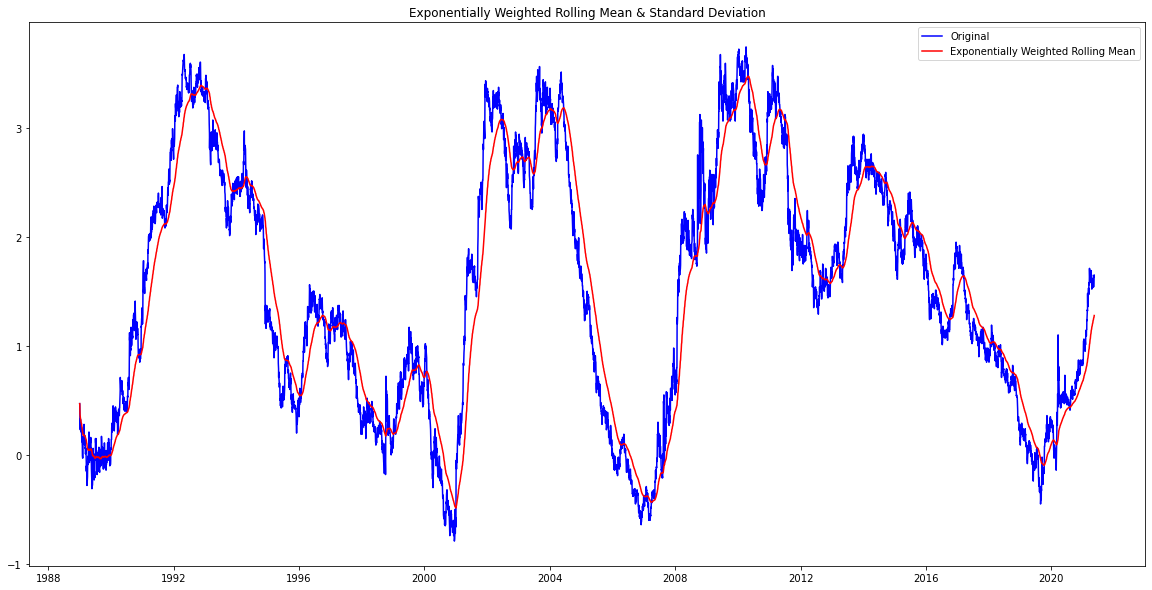

In [29]:

orig = plt.plot(df['ys'], color='blue',label='Original')
mean = plt.plot(exp_roll_mean, color='red', label='Exponentially Weighted Rolling Mean')
plt.legend(loc='best')
plt.title('Exponentially Weighted Rolling Mean & Standard Deviation')
plt.show(block=False)

In [30]:
minus_erm =(df['ys'] - exp_roll_mean).dropna()
minus_erm

date
1989-01-02    0.000000
1989-01-03   -0.004961
1989-01-04   -0.076049
1989-01-05   -0.093805
1989-01-06   -0.090338
                ...   
2021-05-07    0.303865
2021-05-10    0.328762
2021-05-11    0.333584
2021-05-12    0.377721
2021-05-13    0.352253
Name: ys, Length: 8444, dtype: float64

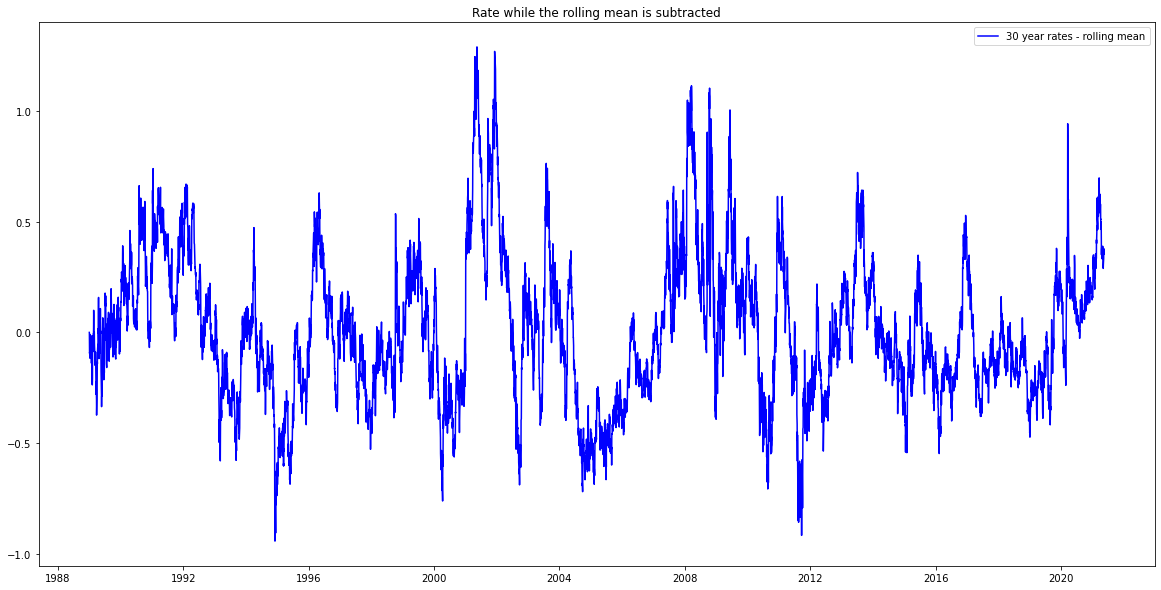

In [31]:
plt.plot(minus_erm, color='blue',label='30 year rates - rolling mean')
plt.legend(loc='best')
plt.title('Rate while the rolling mean is subtracted')
plt.show(block=False)

In [32]:
minus_rm = minus_rm.astype('float')


In [33]:
minus_rm

date
1989-05-05    0.039222
1989-05-08    0.043111
1989-05-09    0.066667
1989-05-10    0.039333
1989-05-11    0.090889
                ...   
2021-05-07    0.198556
2021-05-10    0.220222
2021-05-11    0.222111
2021-05-12    0.264333
2021-05-13    0.237222
Name: ys, Length: 8355, dtype: float64

In [34]:
dts =minus_rm.groupby(pd.Grouper(freq='M')).mean()

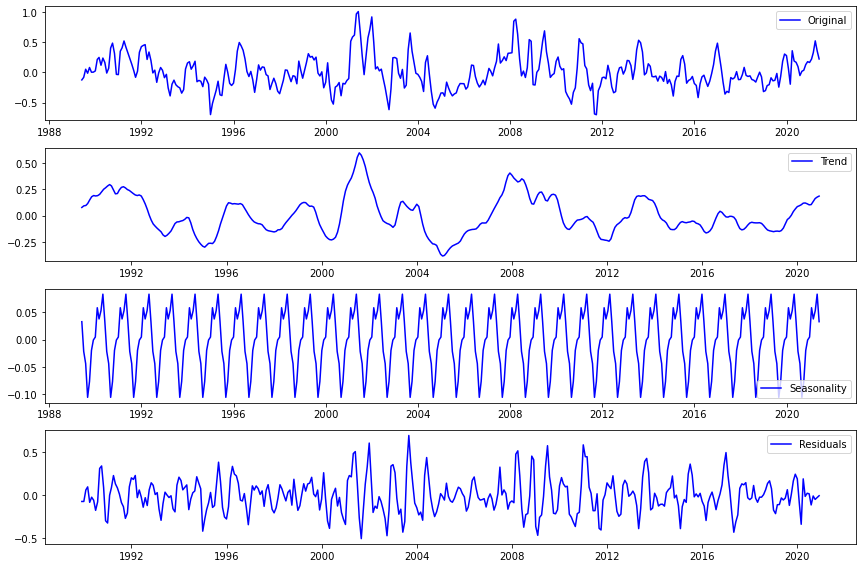

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose


decomposition = seasonal_decompose(dts)

# Gather the trend, seasonality, and residuals 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(dts, label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='blue')
plt.legend(loc='best')
plt.tight_layout()

<AxesSubplot:xlabel='date', ylabel='ys'>

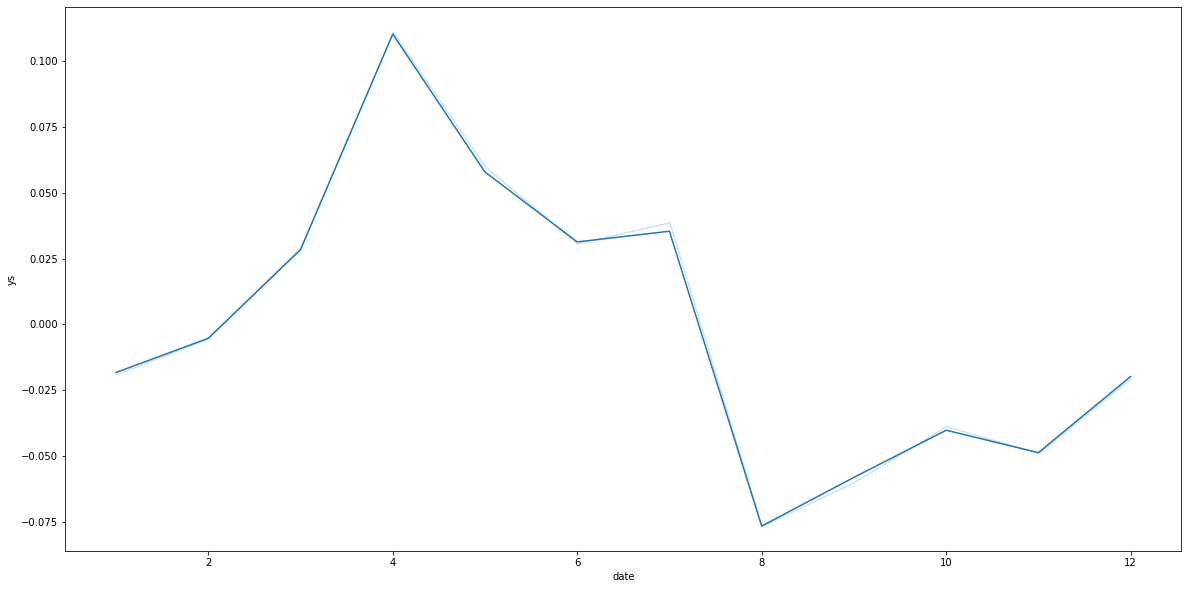

In [36]:
sns.lineplot(x=df.index.month, y=(df['ys']-df['ys'].mean()), ci=False)


<AxesSubplot:xlabel='date', ylabel='ys'>

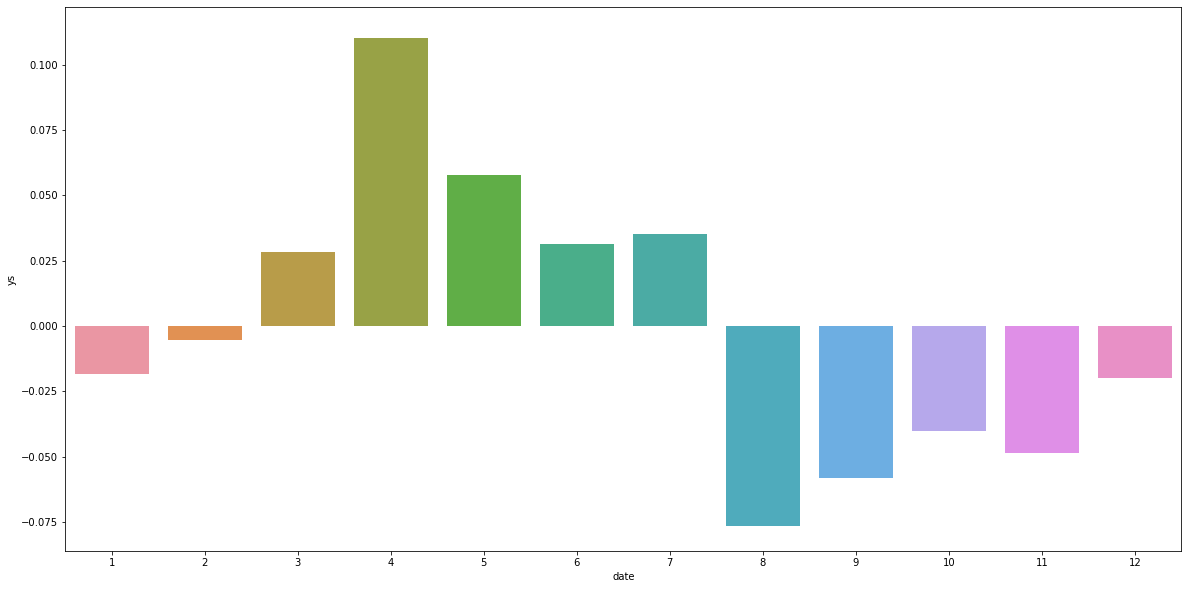

In [37]:
sns.barplot(x=df.index.month, y=(df['ys']-df['ys'].mean()), ci=False)

In [38]:
minus_rm = minus_rm.resample('MS').mean()

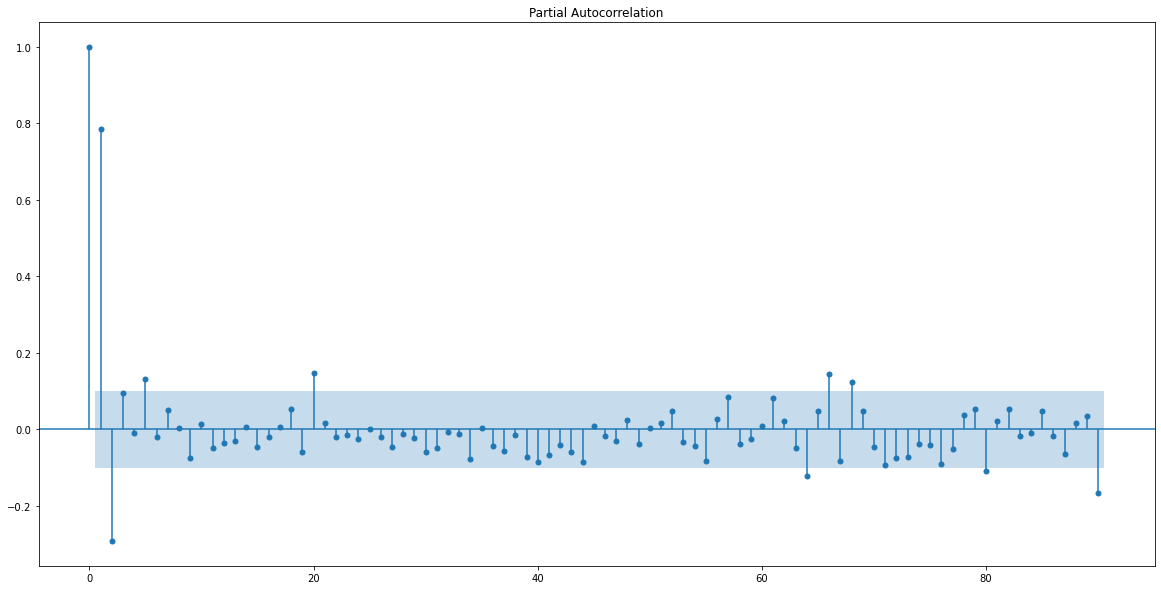

In [39]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

plot_pacf(minus_rm, lags=90);

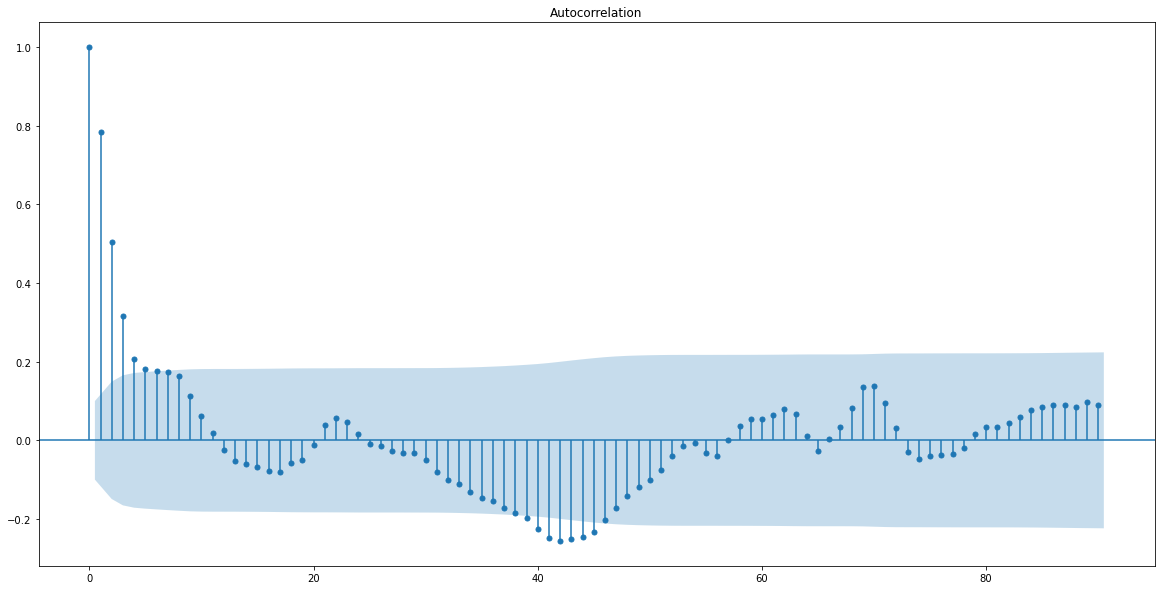

In [40]:
plot_acf(minus_rm, lags=90);

AR(1) model

In [41]:
# Import ARMA
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm


In [52]:
def run_arma(series, p, q):
    n= len(minus_rm)
    mod_arma = ARMA(np.asarray(series), order=(p,q))
    res_arma = mod_arma.fit()
    print(res_arma.summary())

    fig, ax = plt.subplots(figsize=(12, 6))
    res_arma.plot_predict(n-48, n+12, ax=ax)
    fig.tight_layout()


In [43]:

p = q = (0,1,2,3)


combo, value = (None, None)
for ar in p:
    for ma in q:
        try:
            model = ARMA(np.asarray(minus_rm), order=(ar, ma)).fit()
            print('Combo:', (ar, ma),'AIC:', model.aic)

            if value is None or model.aic < value:
                combo, value = ((ar, ma), model.aic)
                print(f'\tBest Parameters Updated')
        except ValueError:
            pass
            
print(f'\n{"*"*20}\nOptimal ARMA order: {combo}') 


Combo: (0, 0) AIC: 118.45836975782674
	Best Parameters Updated
Combo: (0, 1) AIC: -169.56722981510188
	Best Parameters Updated
Combo: (0, 2) AIC: -239.2565032185462
	Best Parameters Updated
Combo: (0, 3) AIC: -274.21784438772306
	Best Parameters Updated
Combo: (1, 0) AIC: -247.4151539477839
Combo: (1, 1) AIC: -282.96868398030233
	Best Parameters Updated
Combo: (1, 2) AIC: -281.01105251388503
Combo: (1, 3) AIC: -280.5868284500182
Combo: (2, 0) AIC: -278.3760334494741
Combo: (2, 1) AIC: -281.03888155805635
Combo: (2, 2) AIC: -279.45939573682426
Combo: (3, 0) AIC: -279.7897894064499
Combo: (3, 1) AIC: -280.0120061598527
Combo: (3, 2) AIC: -278.01224669767294
Combo: (3, 3) AIC: -281.463889619002

********************
Optimal ARMA order: (1, 1)


* These are all so close together.
* Best performance is for (3,3), but there are only modest gains after (1,0)

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  385
Model:                     ARMA(1, 1)   Log Likelihood                 145.484
Method:                       css-mle   S.D. of innovations              0.166
Date:                Mon, 17 May 2021   AIC                           -282.969
Time:                        21:27:42   BIC                           -267.156
Sample:                             0   HQIC                          -276.697
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0091      0.033      0.276      0.782      -0.056       0.074
ar.L1.y        0.6433      0.048     13.529      0.000       0.550       0.737
ma.L1.y        0.4018      0.059      6.799      0.0

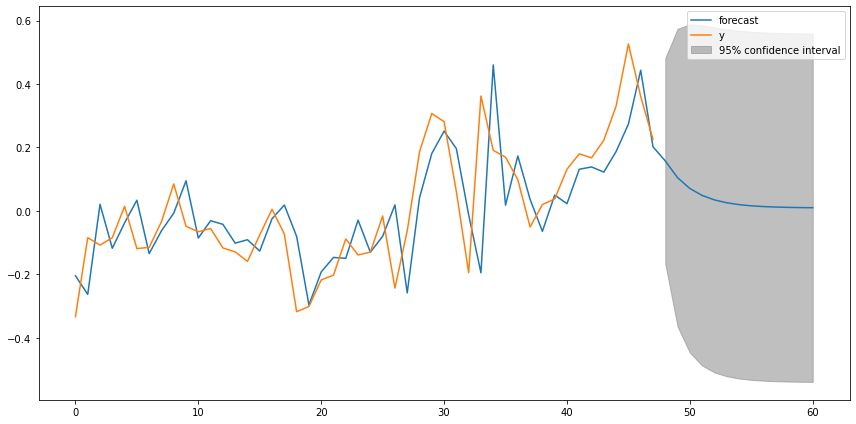

In [53]:
run_arma(minus_rm, 1,1)

In [46]:
minus_rm

date
1989-05-01   -0.123825
1989-06-01   -0.080919
1989-07-01    0.054106
1989-08-01   -0.012444
1989-09-01    0.083270
                ...   
2021-01-01    0.222857
2021-02-01    0.330439
2021-03-01    0.526111
2021-04-01    0.360500
2021-05-01    0.225123
Freq: MS, Name: ys, Length: 385, dtype: float64

In [47]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [48]:
# Setting up parameter combinations.
p = d = q = (0, 1)

pdq = [(ar, diff, ma) for ar in p for diff in d for ma in q]
pdqs = [(c[0], c[1], c[2], 12) for c in pdq]

# Iterate and try models.
combo, value = (None, None)
for pdq_combo in pdq:
    for pdqs_combo in pdqs:
        model = SARIMAX(
            np.asarray(minus_rm), 
            order=pdq_combo,
            seasonal_order=pdqs_combo,
            enforce_stationarity=False,
            enforce_invertibility=False
            )
        output = model.fit()

        if value is None or output.aic < value:
            combo, value = ((pdq_combo, pdqs_combo), output.aic)
            print('SARIMA Combos:', (pdq_combo, pdqs_combo),'AIC:', output.aic)
                
            
print(f'\n{"*"*20}\nOptimal SARIMA order: {combo}')

C:\Users\saifw\anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
SARIMA Combos: ((0, 0, 0), (0, 0, 0, 12)) AIC: 117.33314365397707
SARIMA Combos: ((0, 0, 1), (0, 0, 0, 12)) AIC: -169.12122839299596
C:\Users\saifw\anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
SARIMA Combos: ((0, 1, 0), (0, 0, 0, 12)) AIC: -205.97352874817875
SARIMA Combos: ((0, 1, 1), (0, 0, 0, 12)) AIC: -217.20349423803907
SARIMA Combos: ((1, 0, 0), (0, 0, 0, 12)) AIC: -248.85322311420893
SARIMA Combos: ((1, 0, 1), (0, 0, 0, 12)) AIC: -282.63772263324194

********************
Optimal SARIMA order: ((1, 0, 1), (0, 0, 0, 12))
